### Lucelia Lima [ Github](https://github.com/LuceliaLima/desafio_CD)

Lighthouse Programa de Formação em Dados [ Indicium](https://www.indicium.tech/)

# Analisando os Dados da Cidade New York

![Alt Text](https://github.com/LuceliaLima/LH_CD_LUCELIA/blob/main/img/Banner_NY.jpg?raw=true)

## New York City

A cidade de Nova York é mais populosa do que qualquer cidade brasileira. Com uma população de mais de 8 milhões de habitantes, Nova York é uma das cidades mais densamente povoadas dos Estados Unidos e é um centro cultural, econômico e político importante não só para o país, mas também para o mundo. 

A cidade abrange cinco regiões chamadas **boroughs** são estes: Bronx, Brooklyn, Manhattan, Queens e Staten Island.



- **1 - Manhattan é o grande centro**, é o coração de Nova York, é conhecida por seus arranha-céus icônicos, como o Empire State Building e o One World Trade Center. É o centro financeiro, comercial e cultural da cidade, abrigando instituições como Wall Street, a Broadway e a Times Square. 
- **2 - Brookly** localizado ao sudoeste de Manhattan, é o **borough mais populoso de Nova York** e é conhecido por sua diversidade étnica e cultural e maiores instalações portuárias da cidade.
- **3 - Queens** é uma mistura de **áreas residenciais, comerciais e industriais bem deversificada**, com grandes aeroportos e estádios de tênis e baisebol. 
- **4 - Bronx** localizado ao norte de Manhattan, é o **local mais pobre e violento da cidade e do país.** 
- **5 - Staten Island** situado ao sul de Manhattan, é conhecido por seu **ambiente mais suburbano** em comparação com os outros boroughs. Possui grandes áreas verdes e praias. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/800px-5_Boroughs_Labels_New_York_City_Map.svg.png" width='65%'>
fonte: https://pt.wikipedia.org/wiki/Boroughs_de_Nova_Iorque

#  <font color='red'>Desafio Cientista de Dados</font>

Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York.  Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma **análise exploratória dos dados** de seu maior concorrente, assim como um **teste de validação de um modelo preditivo**.

### Objetivo:
- Desenvolver um modelo de previsão de **preços** a partir do dataset oferecido; 
- Avaliar tal modelo utilizando as **métricas de avaliação** que mais fazem sentido para o problema. 

## Importação das bibliotecas

Usaremos as seguintes bibliotecas para a análise:
* pandas - version: 2.2.0
* matplotlib - version: 3.7.2
* seaborn - version: 0.12.2
* scikit-learn - version: 1.3.0
* wordcloud - version: 1.9.3
* xgboost - version: 2.0.3
* lightgbm- version: 4.3.0
* catboost - version: 1.2.2
* Python - version: 3.11.5

In [2]:
# Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from wordcloud import WordCloud, ImageColorGenerator

# modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Análise de Dados 
Esta fase tem como objetivo compreender como os dados estão estruturados.

### **Dicionário de variáveis:**

*   **id** - Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
*   **name** - O nome do anúncio (propriedade)
*   **host_id** - O id do usuário que hospedou o anúncio
*   **host_name** - Nome do usuário que hospedou o anúncio
*   **bairro_group** - Nome do bairro onde o anúncio está localizado
*   **bairro** - Nome da área onde o anúncio está localizado.
*   **latitude** - Latitude do local
*   **longitude** - Longitude do local
*   **room_type** - Tipo de espaço de cada anúncio (tipo de quarto)
*   **price** - Preço por noite em dólares listado pelo anfitrião
*   **minimo_noites** - Número mínimo de noites que o usuário deve reservar
*   **numero_de_reviews** - Número de comentários(avaliações) dados a cada listagem
*   **ultima_review** - Data da última revisão dada à listagem
*   **reviews_por_mes** - Número de avaliações fornecidas por mês
*   **calculado_host_listings_count** - Quantidade de imóveis por anfitrião.
*   **disponibilidade_365** - Número de dias em que o anúncio está disponível para reserva em 365 dias

In [4]:
# Mostrar as 5 primeiras entradas
df = pd.read_csv('teste_indicium_precificacao.csv', encoding='utf-8')
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [5]:
# verificando quantidades de linhas e colunas
print(f"Linhas: {df.shape[0]}.")
print(f"Colunas: {df.shape[1]}.")

Linhas: 48894.
Colunas: 16.


In [6]:
# informações básicas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [7]:
#Verificando se há dados faltantes
(df.isnull().sum() / df.shape[0] * 100).sort_values( ascending =  False)

ultima_review                    20.558760
reviews_por_mes                  20.558760
host_name                         0.042950
nome                              0.032724
id                                0.000000
host_id                           0.000000
bairro_group                      0.000000
bairro                            0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimo_noites                     0.000000
numero_de_reviews                 0.000000
calculado_host_listings_count     0.000000
disponibilidade_365               0.000000
dtype: float64

**Podemos perceber que:**

*  As colunas **host_name** e **nome** possuem menos de 1% de dados faltantes.
*  As colunas **ultima_review** e **reviews_por_mes** possuem 20.55% dos dados faltantes.

In [8]:
print(f"Total de dados faltantes: {df.isnull().values.sum()}.")

Total de dados faltantes: 20141.


In [9]:
# Dropando colunas desnecessárias
df.drop(['id', 'host_name', 'ultima_review','reviews_por_mes'], axis=1, inplace=True)

In [10]:
#Substituindo nome por no_nome
df['nome'].fillna('no_nome',inplace=True)
print(df.isnull().sum())

nome                             0
host_id                          0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


In [11]:
# Não existe dados duplicados
df[df.duplicated()].head()

,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365


### Análise Estatística

In [12]:
df.describe()

,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,7.144005,112.776169
std,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,32.952855,131.618692
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


A partir do resumo estatístico dos dados pela função describe podemos concluir que:

- 50% dos preços dos aluguéis estão abaixo 106 mil dólar e 50% está acima de 106.
- 75% dos preços dos aluguéis são menores ou iguais a 175 mil dólar.
- Na variável minimo_noites o máximo de noites é de 1250, ou seja, mais de um ano (365 dias).

In [13]:
df.shape

(48894, 12)

### **Distribuição das Variáveis:**

Descobrir os tipos de distribuição das variáveis e outliers podem ser detectados usando visualização (histograma, boxplot).

**Histogramas:**

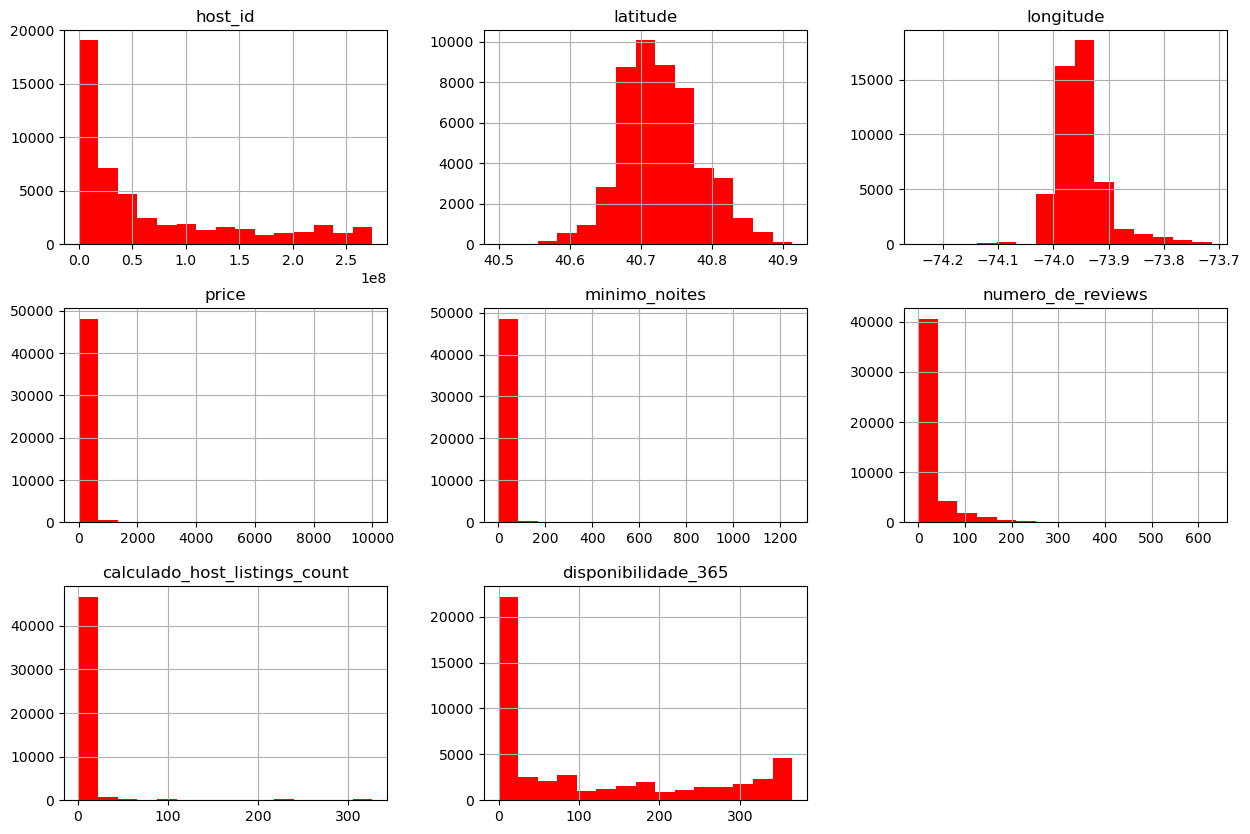

In [14]:
df.hist(bins=15, figsize=(15,10), color='red');

### Detectando e Removendo Outliers

Os outliers serão analisados através do boxplot, caso houver, serão tratados. Procedimento será realizado em duas variáveis: `price` e `minimo_noites`.

#### Boxplot e Histograma dos Preços:

Antes da remoção dos outliers:
Q1: 69.0
Q3: 175.0
IQR: 106.0

O limite superior é: 334.0
O limite inferior é: -90.0

O dataset contém 48894 linhas
Serão removidas 2972 linhas
Isso corresponde a 6.08% dos dados

Depois da remoção dos outliers:
O dataset agora contém 45922 linhas


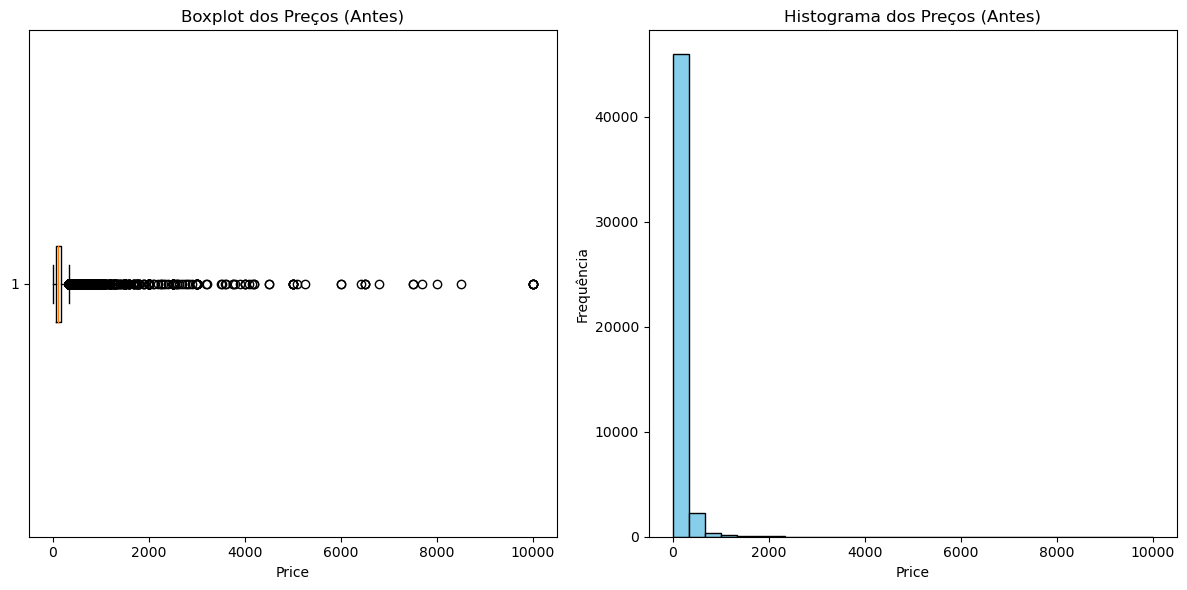

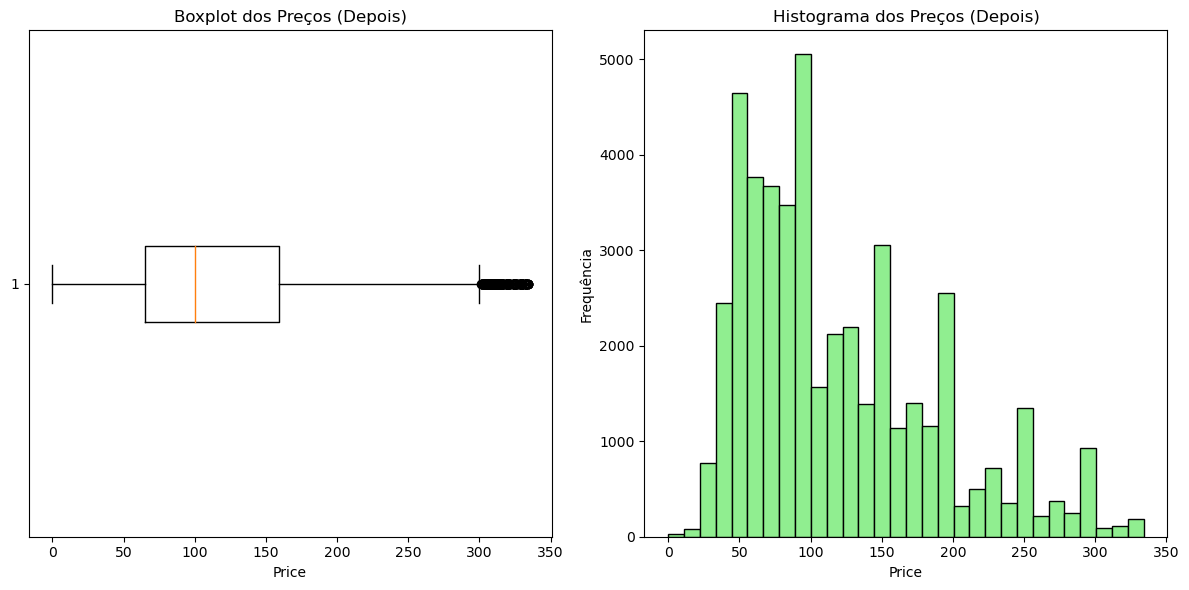

In [15]:
# Definindo IQR
q1_price, q3_price = df.price.quantile([.25, .75])
IQR_price = q3_price - q1_price

# Definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

# Identificando os outliers
outliers = df.loc[(df.price > sup_price) | (df.price < inf_price)]

# Removendo os outliers
df_cleaned = df.loc[(df.price <= sup_price) & (df.price >= inf_price)]

# Exibindo informações antes da remoção dos outliers
print("Antes da remoção dos outliers:")
print("Q1: {}".format(q1_price))
print("Q3: {}".format(q3_price))
print("IQR: {}\n".format(IQR_price))
print("O limite superior é: {}".format(sup_price))
print("O limite inferior é: {}\n".format(inf_price))
print("O dataset contém {} linhas".format(df.shape[0]))
print("Serão removidas {} linhas".format(outliers.shape[0]))
print("Isso corresponde a {:.2f}% dos dados\n".format(outliers.shape[0] / df.shape[0] * 100))

# Exibindo informações depois da remoção dos outliers
print("Depois da remoção dos outliers:")
print("O dataset agora contém {} linhas".format(df_cleaned.shape[0]))

# Criando gráficos antes e depois da remoção dos outliers
plt.figure(figsize=(12, 6))

# Boxplot antes da remoção dos outliers
plt.subplot(1, 2, 1)
plt.boxplot(df.price, vert=False)
plt.title('Boxplot dos Preços (Antes)')
plt.xlabel('Price')

# Histograma antes da remoção dos outliers
plt.subplot(1, 2, 2)
plt.hist(df.price, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma dos Preços (Antes)')
plt.xlabel('Price')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Criando gráficos depois da remoção dos outliers
plt.figure(figsize=(12, 6))

# Boxplot depois da remoção dos outliers
plt.subplot(1, 2, 1)
plt.boxplot(df_cleaned.price, vert=False)
plt.title('Boxplot dos Preços (Depois)')
plt.xlabel('Price')

# Histograma depois da remoção dos outliers
plt.subplot(1, 2, 2)
plt.hist(df_cleaned.price, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histograma dos Preços (Depois)')
plt.xlabel('Price')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

#### Boxplot e Histograma Minimo Noites:

Antes da remoção dos outliers:
Q1: 1.0
Q3: 5.0
IQR: 4.0

O limite superior é: 11.0
O limite inferior é: -5.0

O dataset contém 48894 linhas
Serão removidas 6607 linhas
Isso corresponde a 13.51% dos dados

Depois da remoção dos outliers:
O dataset agora contém 42287 linhas


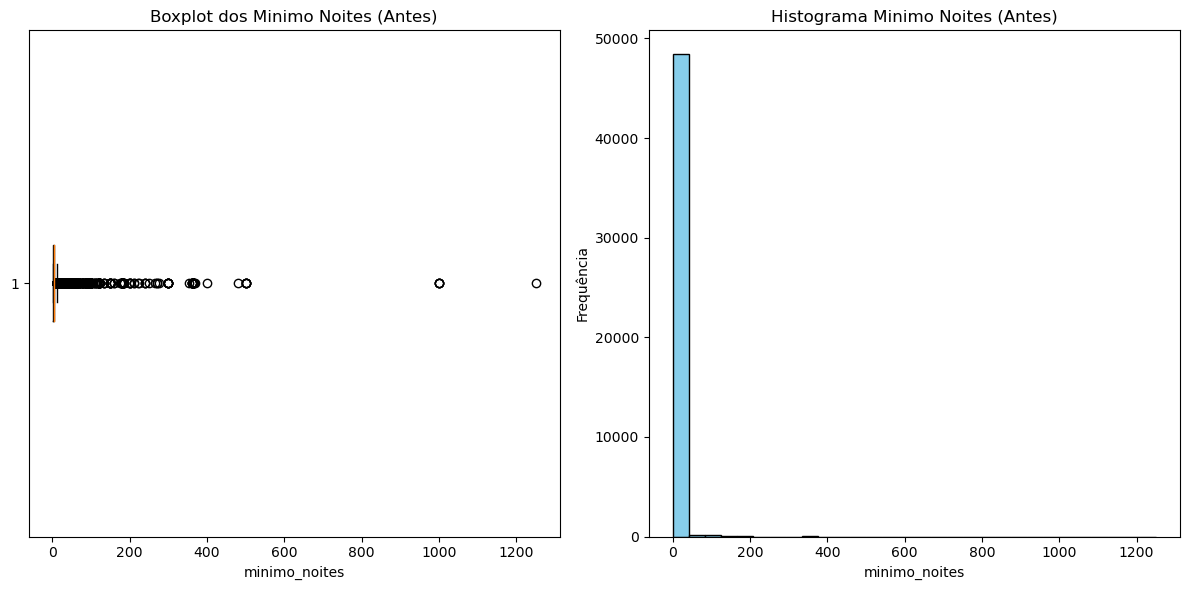

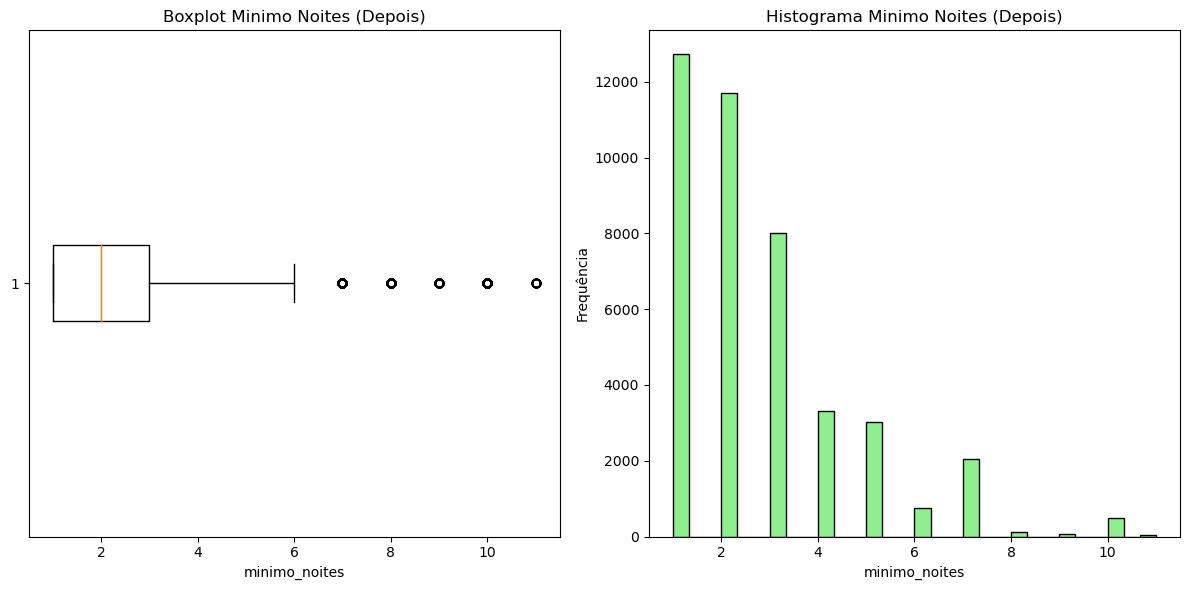

In [16]:
# Definindo IQR

q1_minimo_noites, q3_minimo_noites = df.minimo_noites.quantile([.25, .75])
IQR_minimo_noites = q3_minimo_noites - q1_minimo_noites

# Definindo os limites
sup_minimo_noites = q3_minimo_noites + 1.5 * IQR_minimo_noites
inf_minimo_noites = q1_minimo_noites - 1.5 * IQR_minimo_noites

# Identificando os outliers
outliers = df.loc[(df.minimo_noites > sup_minimo_noites) | (df.minimo_noites < inf_minimo_noites)]

# Removendo os outliers
df_cleaned = df.loc[(df.minimo_noites <= sup_minimo_noites) & (df.minimo_noites >= inf_minimo_noites)]

# Exibindo informações antes da remoção dos outliers
print("Antes da remoção dos outliers:")
print("Q1: {}".format(q1_minimo_noites))
print("Q3: {}".format(q3_minimo_noites))
print("IQR: {}\n".format(IQR_minimo_noites))
print("O limite superior é: {}".format(sup_minimo_noites))
print("O limite inferior é: {}\n".format(inf_minimo_noites))
print("O dataset contém {} linhas".format(df.shape[0]))
print("Serão removidas {} linhas".format(outliers.shape[0]))
print("Isso corresponde a {:.2f}% dos dados\n".format(outliers.shape[0] / df.shape[0] * 100))

# Exibindo informações depois da remoção dos outliers
print("Depois da remoção dos outliers:")
print("O dataset agora contém {} linhas".format(df_cleaned.shape[0]))

# Criando gráficos antes e depois da remoção dos outliers
plt.figure(figsize=(12, 6))

# Boxplot antes da remoção dos outliers
plt.subplot(1, 2, 1)
plt.boxplot(df.minimo_noites, vert=False)
plt.title('Boxplot dos Minimo Noites (Antes)')
plt.xlabel('minimo_noites')

# Histograma antes da remoção dos outliers
plt.subplot(1, 2, 2)
plt.hist(df.minimo_noites, bins=30, color='skyblue', edgecolor='black')
plt.title('Histograma Minimo Noites (Antes)')
plt.xlabel('minimo_noites')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Criando gráficos depois da remoção dos outliers
plt.figure(figsize=(12, 6))

# Boxplot depois da remoção dos outliers
plt.subplot(1, 2, 1)
plt.boxplot(df_cleaned.minimo_noites, vert=False)
plt.title('Boxplot Minimo Noites (Depois)')
plt.xlabel('minimo_noites')

# Histograma depois da remoção dos outliers
plt.subplot(1, 2, 2)
plt.hist(df_cleaned.minimo_noites, bins=30, color='lightgreen', edgecolor='black')
plt.title('Histograma Minimo Noites (Depois)')
plt.xlabel('minimo_noites')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [17]:
df_cleaned

,nome,host_id,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
0,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
1,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
2,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
3,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
4,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...
48889,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48890,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48891,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48892,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


In [18]:
print(df_cleaned.isnull().sum())

nome                             0
host_id                          0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


### 1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

#### Coeficiente de Correlação de Pearson

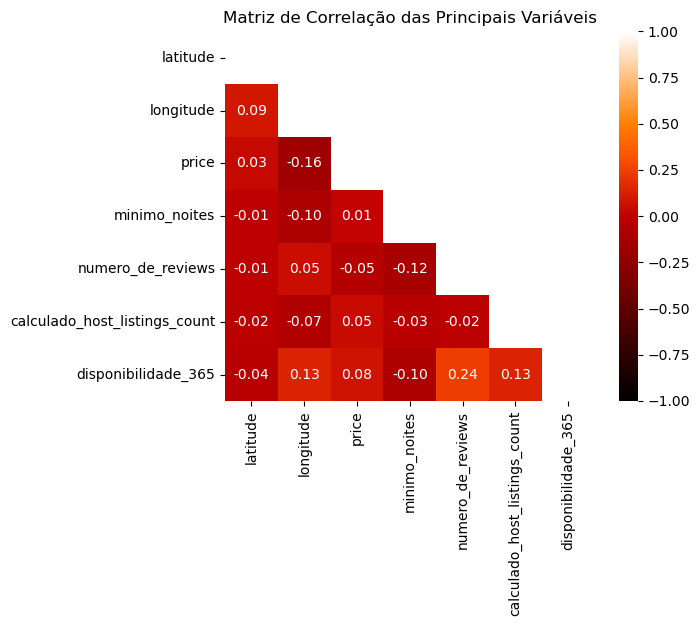

In [19]:
corr = df_cleaned[['latitude', 'longitude','price', 'minimo_noites', 'numero_de_reviews',
                 'calculado_host_listings_count','disponibilidade_365']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='gist_heat', fmt='.2f', square=True,  vmin=-1, vmax=1, linecolor='white', annot=True, mask=mask)
plt.title('Matriz de Correlação das Principais Variáveis')
plt.show()

#### Gráfico de Dispersão entre Número de Reviews vs Preço

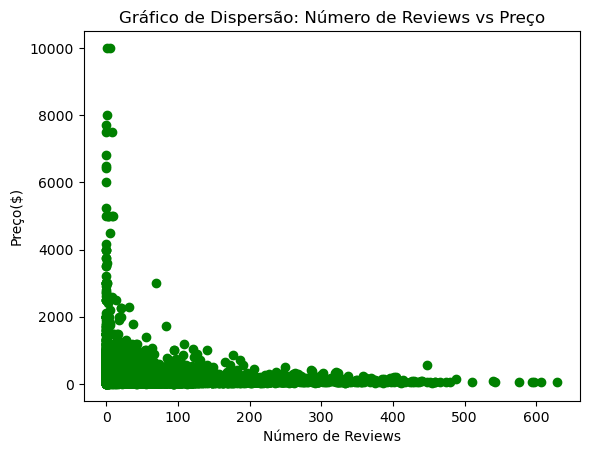

In [20]:
plt.scatter(df_cleaned["numero_de_reviews"], df_cleaned["price"], color="green")
plt.xlabel("Número de Reviews")
plt.ylabel("Preço($)")
plt.title("Gráfico de Dispersão: Número de Reviews vs Preço")
plt.show()

O número de reviews pode ser um indicador da popularidade e reputação de uma propriedade. O grande número de reviews geralmente indicam uma alta demanda e satisfação dos hóspedes. Responder proativamente aos feedbacks dos hóspedes pode melhorar a satisfação geral e levar a um aumento no número de reviews positivos, o que, por sua vez, pode impactar positivamente os preços.

Monitorar o número de reviews ao longo do tempo pode ajudar os proprietários a avaliar a eficácia de suas estratégias de atendimento ao cliente e gestão da experiência do hóspede.

#### Gráfico de Dispersão entre Preço vs Número Mínimo de Noites

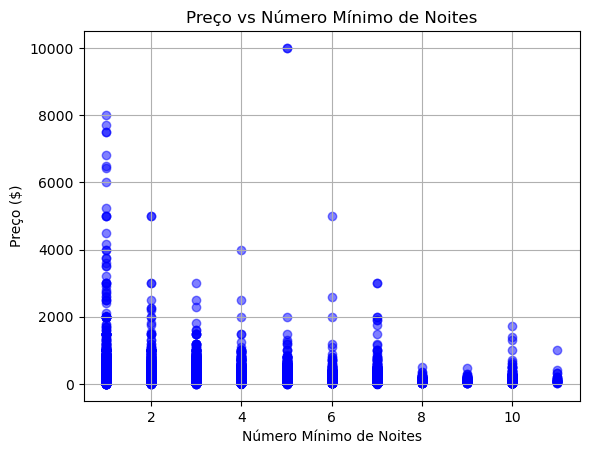

In [20]:
# Extrair as variáveis de interesse
prices = df_cleaned['price']
minimo_noites = df_cleaned['minimo_noites']

# Criando o scatter plot
plt.scatter(minimo_noites, prices, alpha=0.5, color='blue')
plt.title('Preço vs Número Mínimo de Noites')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço ($)')
plt.grid(True)
plt.show()

Pode-se notar se propriedades com um número mínimo de noites mais longo tendem a ter preços mais altos, o que pode indicar uma demanda por estadias mais longas ou uma estratégia de preços para incentivar reservas mais longas. O que pode ajudar os proprietários a determinar a rentabilidade de estadias mais longas em comparação com estadias mais curtas.

#### Gráfico de Barra de Preço Médio por Tipo de Quarto e Grupo de Bairro

bairro_group      Bronx  Brooklyn  Manhattan  Queens  Staten Island  \
room_type                                                             
Entire home/apt  130.20    180.16     250.79  148.54         171.25   
Private room      67.98     76.83     116.47   70.53          62.90   
Shared room       61.09     54.59      90.48   71.68          57.44   

bairro_group     Média Geral  
room_type                     
Entire home/apt       176.19  
Private room           78.94  
Shared room            67.06  




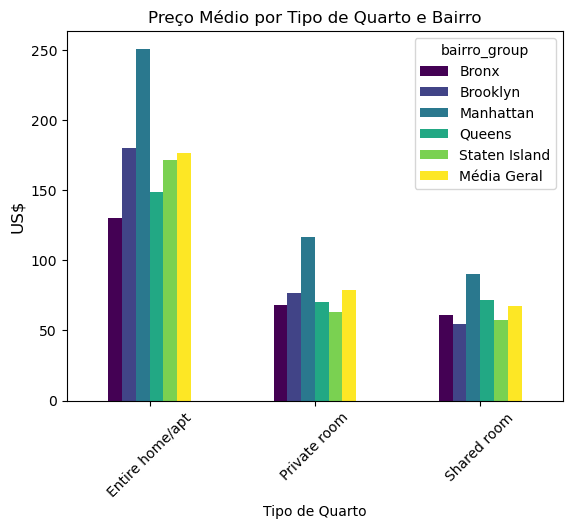

In [21]:
## Calcular o preço médio por tipo de quarto e por bairro
type_price = df_cleaned.groupby(['room_type', 'bairro_group']).price.mean().round(2).unstack()

# Calcular o preço médio geral por tipo de quarto
type_price['Média Geral'] = type_price.mean(axis=1).round(2)

# Exibir os resultados
print(type_price)
print('\n')

# Plotar o preço médio por tipo de quarto e por bairro
ax = type_price.plot(kind='bar', colormap='viridis')
ax.set_title('Preço Médio por Tipo de Quarto e Bairro')
ax.set_ylabel('US$', fontsize=12)
ax.set_xlabel('Tipo de Quarto')
ax.tick_params(axis='x', rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade

- A maioria das casas/aptos tem uma média geral de 176.19% e estão localizados em Manhattan e altos valores US$ 250.79
- A maioria dos quartos privados está localizada no Brooklyn com uma média geral de 78.94%.

#### Gráfico de Barra de Preço Médio de Entire home/apt por Grupo de Bairro

bairro_group
Bronx            130.20
Brooklyn         180.16
Manhattan        250.79
Queens           148.54
Staten Island    171.25
Name: price, dtype: float64




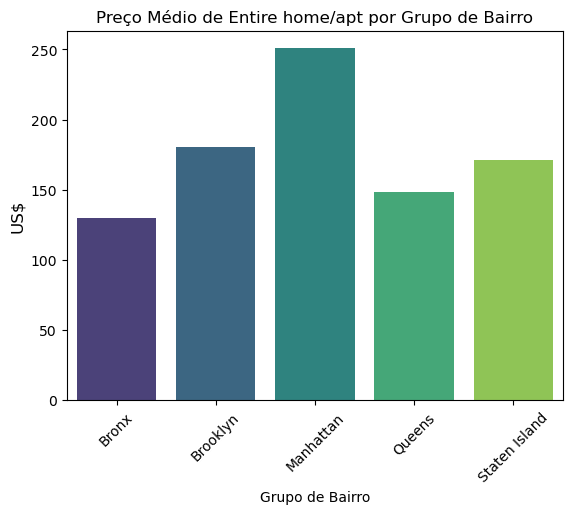

In [22]:
# Filtrar o DataFrame para conter apenas o tipo de quarto "Entire home/apt"
df_entire_home = df_cleaned[df_cleaned['room_type'] == 'Entire home/apt']

# Calcular o preço médio por grupo de bairro
price_bairro = df_entire_home.groupby('bairro_group')['price'].mean().round(2)

# Exibir os resultados
print(price_bairro)
print('\n')

# Plotar o preço médio por grupo de bairro
ax = sns.barplot(x=price_bairro.index, y=price_bairro, palette='viridis')
ax.set_title('Preço Médio de Entire home/apt por Grupo de Bairro')
ax.set_ylabel('US$', fontsize=12)
ax.set_xlabel('Grupo de Bairro')
ax.tick_params(axis='x', rotation=45)  # Rotacionar os rótulos do eixo x para melhor legibilidade
#sns.despine()  # Remover as bordas do gráfico

plt.show()

Manhattan tem os aluguéis mais caros em comparação com os outros bairros. Os preços são mais altos para locações mais próximas dos pontos de acesso da cidade. 

#### Gráfico de Barra contagem de cada tipo de quarto em Nova York entre os principais grupo de bairros (Manhattan e Brookly)

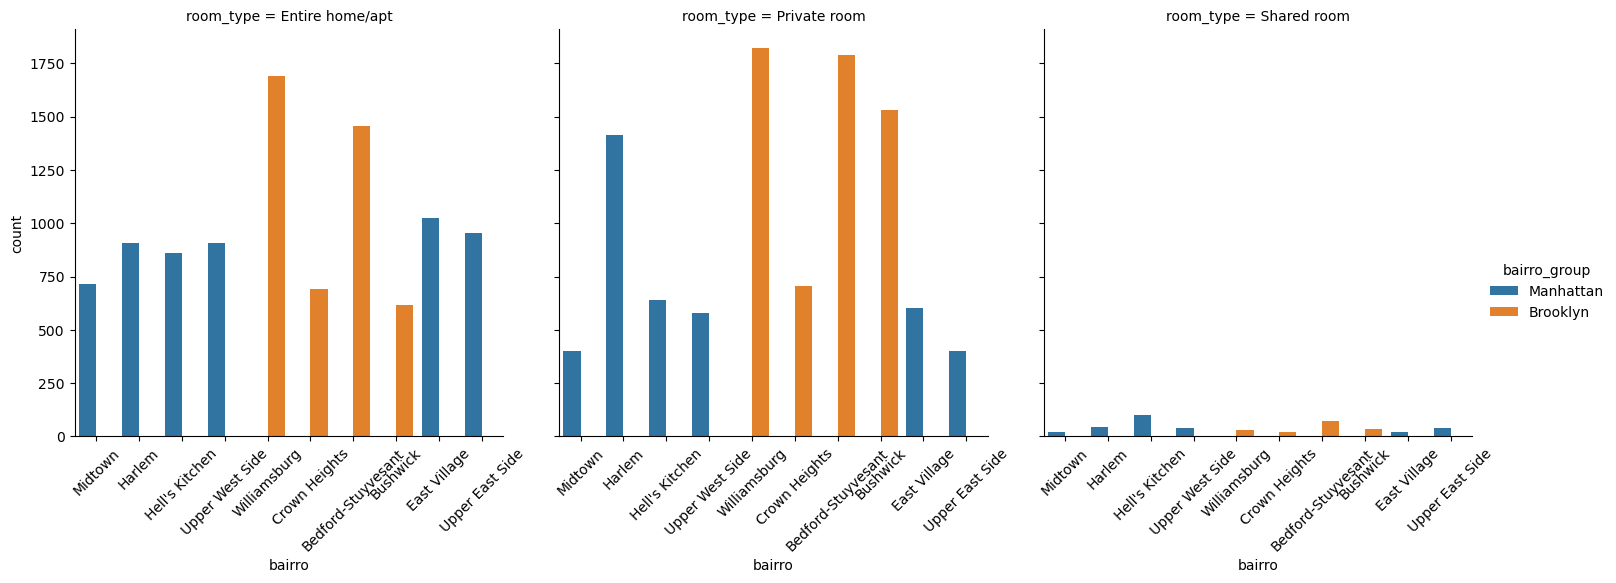

In [23]:
sub=df_cleaned.loc[df_cleaned['bairro'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                                'Upper West Side','Hell\'s Kitchen','East Village',
                                'Upper East Side','Crown Heights','Midtown'])]
# usando catplot para representar vários atributos interessantes juntos e uma contagem
barr=sns.catplot(x='bairro', hue='bairro_group', col='room_type', data=sub, kind='count', palette='tab10')
barr.set_xticklabels(rotation=45);

Uma observação notável é a escassez de anúncios do tipo 'quarto compartilhado' nos 10 bairros mais populosos. A presença desses anúncios está concentrada principalmente em Manhattan e Brooklyn, o que era esperado, considerando que são destinos turísticos populares. Entre esses bairros, Bedford-Stuyvesant e Williamsburg são os mais populares em Manhattan, enquanto Harlem é o mais popular em Brooklyn.

#### Gráfico de Barra de Contagem de cada tipo de quarto em Nova York

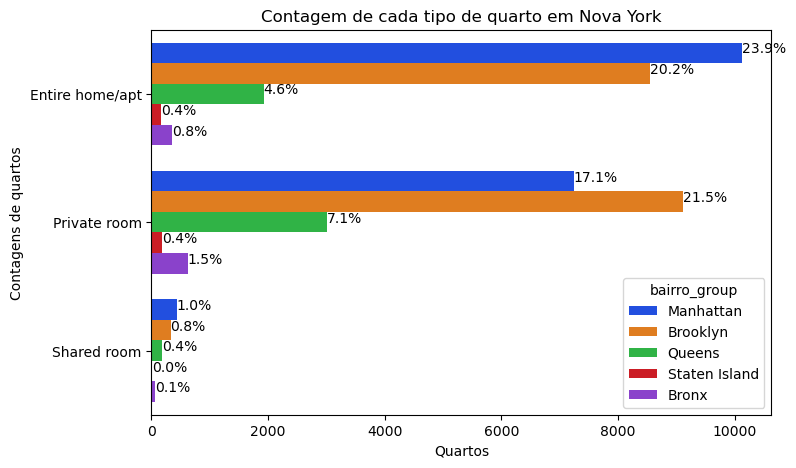

In [24]:
plt.rcParams['figure.figsize'] = (8, 5)
ax = sns.countplot(y='room_type', hue='bairro_group', data=df_cleaned, palette='bright')

total = len(df_cleaned['room_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    ax.annotate(percentage, (p.get_width() + 0.02, p.get_y() + p.get_height() / 2))

plt.title('Contagem de cada tipo de quarto em Nova York')
plt.xlabel('Quartos')
plt.ylabel('Contagens de quartos')
plt.show()

As distribuições de diferentes tipos de propriedades listadas em diferentes bairros de Nova York. Manhattan lidera com aproximadamente 23.9% das propriedades sendo casas ou apartamentos inteiros, seguida por Brooklyn com cerca de 20.2%. 

Em contraste, Brooklyn tem a maior proporção de quartos privados, representando 21.5% do total, seguido por Manhattan com 17.1%. O Queens contribui com 7.1% dos quartos privados. 

Quartos compartilhados são raros em Staten Island e Bronx. Em resumo, Brooklyn, Queens e Bronx têm uma variedade maior de quartos privados, enquanto Manhattan, com o maior número total de listagens, possui mais casas e apartamentos inteiros.

### 2. Responda também às seguintes perguntas:

### a. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

In [25]:
# tipo de imóvel mais alugado 
room_type_percentage = df_cleaned.room_type.value_counts() / df.shape[0] * 100
room_type_percentage = room_type_percentage.round(2)

# Calculando a média do preço para cada tipo de quarto
room_type_mean_price = df_cleaned.groupby('room_type')['price'].mean().round(2)

# Juntando as porcentagens e médias em um DataFrame
room_type_stats = pd.DataFrame({'Porcentagem (%)': room_type_percentage, 'Preço médio': room_type_mean_price})

print(room_type_stats)

                 Porcentagem (%)  Preço médio
room_type                                    
Entire home/apt            43.18       210.24
Private room               41.24        89.74
Shared room                 2.07        73.42


Os imóveis mais alugados em New York são os do tipo casa ou apartamento, sendo esses equivalente a 43,18\% com preço em média de 210,24 dólar e quarto privado, sendo equivalente a 41,24\% com preço em média de 89,74 dólar

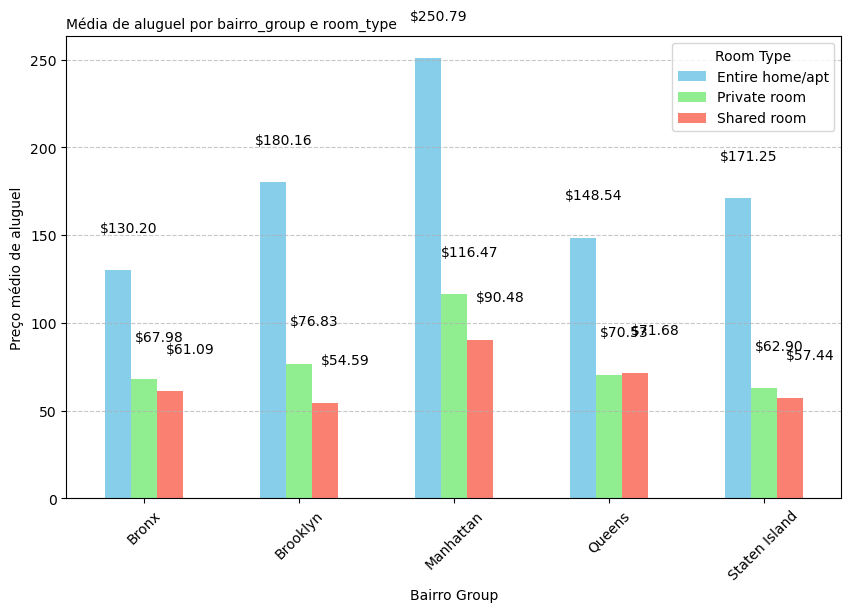

In [26]:
# Média de aluguel por borough e room_type
borough_roomtype = df_cleaned.groupby(['bairro_group', 'room_type'])['price'].mean().unstack()

# Plotagem do gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
borough_roomtype.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen', 'salmon'])

# Adicionando rótulos nos valores das barras
for i, borough in enumerate(borough_roomtype.index):
    for j, room_type in enumerate(borough_roomtype.columns):
        ax.text(i + j * 0.2 - 0.1, borough_roomtype.loc[borough, room_type] + 20,
                '${:.2f}'.format(borough_roomtype.loc[borough, room_type]),
                ha='center', va='bottom', fontsize=10, color='black')

# Configurações adicionais do gráfico
ax.set_title('Média de aluguel por bairro_group e room_type', loc='left', fontsize=10)
ax.set_ylabel('Preço médio de aluguel')
ax.set_xlabel('Bairro Group')
ax.legend(title='Room Type')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.show()

Investir em um apartamento em Manhattan pode ser uma escolha estratégica devido à alta demanda e aos preços médios mais elevados. Propriedades em Manhattan têm um preço médio de $210,24, indicando uma forte demanda nessa área. Investir em apartamentos pode ser mais vantajoso do que casas, considerando que apartamentos representam 43,18% dos aluguéis mais populares em Nova York. 

### b. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

In [28]:
print('Média minimo noites {:.0f} dias'.format( df_cleaned.minimo_noites.mean()))

Média minimo noites 3 dias


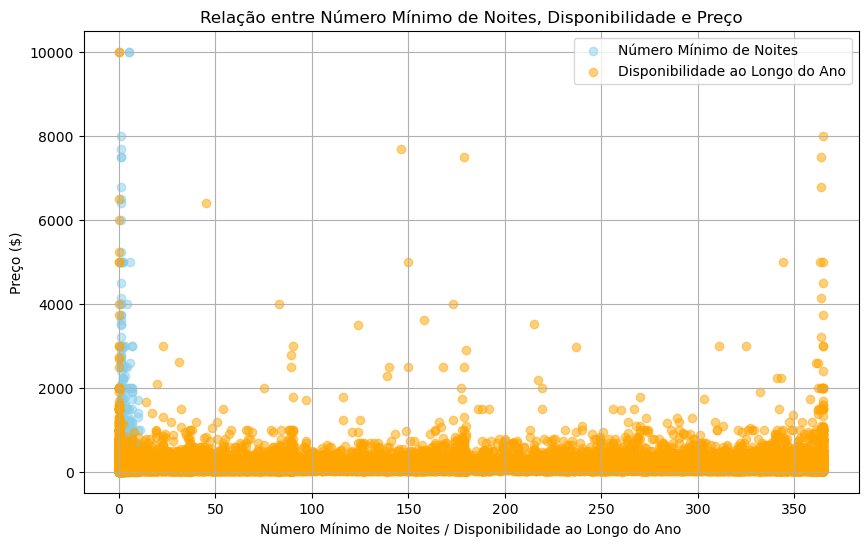

In [29]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['minimo_noites'], df_cleaned['price'], color='skyblue', alpha=0.5, label='Número Mínimo de Noites')
plt.scatter(df_cleaned['disponibilidade_365'], df_cleaned['price'], color='orange', alpha=0.5, label='Disponibilidade ao Longo do Ano')
plt.title('Relação entre Número Mínimo de Noites, Disponibilidade e Preço')
plt.xlabel('Número Mínimo de Noites / Disponibilidade ao Longo do Ano')
plt.ylabel('Preço ($)')
plt.legend()
plt.grid(True)
plt.show()

A disponibilidade ao longo do ano também pode afetar o preço das acomodações. Propriedades com alta disponibilidade, ou seja, mais dias disponíveis para reserva ao longo do ano, podem ter preços mais competitivos para atrair reservas e maximizar a ocupação. Por outro lado, propriedades com disponibilidade limitada podem ter preços mais elevados, especialmente durante períodos de alta demanda, como feriados ou eventos especiais. Acomodações que exigem um número maior de noites mínimas podem ter preços mais elevados.

### c. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

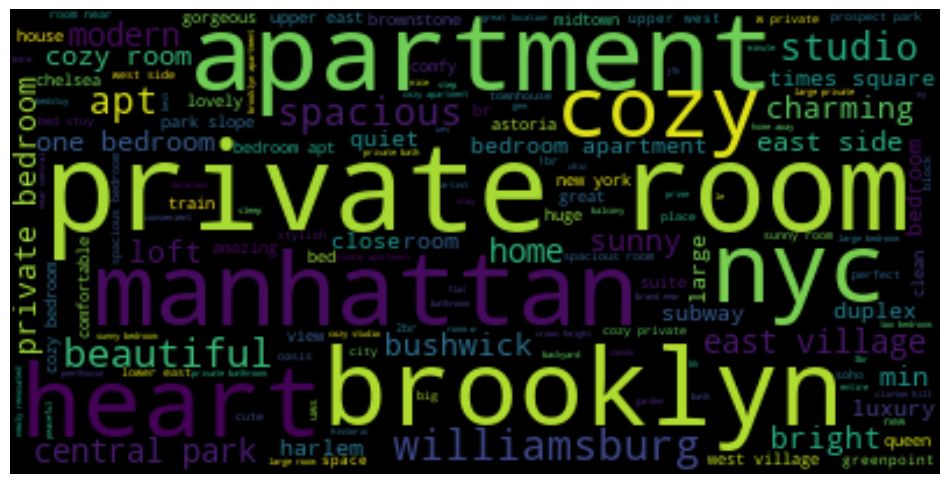

In [30]:
# Concatenar todos os nomes em uma única string, converter para minúsculas
text = ' '.join(str(n).lower() for n in df_cleaned.nome)

# Criar a nuvem de palavras com um máximo de 200 palavras e fundo branco
wordcloud = WordCloud(max_words=200, background_color='black').generate(text)

# Plotar a nuvem de palavras
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

A presença de palavras como "Manhattan" e "Brooklyn" no nome do local sugere que a localização é um fator significativo no valor das acomodações. Manhattan, conhecido por ser um dos distritos mais desejáveis e com alto custo de vida em Nova York, pode ter acomodações com preços mais elevados em comparação com outras áreas. Por outro lado, áreas como Brooklyn podem oferecer opções mais acessíveis, mas ainda valorizadas.

Compreender o padrão no texto do nome do local pode informar as estratégias de marketing para proprietários de acomodações. Destacar a localização privilegiada, como "Manhattan", ou características exclusivas da propriedade, como "private room" ou "apartment", pode atrair viajantes dispostos a pagar mais pelo valor percebido. Os proprietários podem considerar ajustes de preços com base nas palavras-chave identificadas nos nomes dos locais. 

### 3. Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Respostas as perguntas estão incluídas no doc. em PDF (reports) no github

RMSE: 205.4655 (LR)
R^2 Score: 0.0462 (LR)
MAE: 85.42 (LR)
MSE: 42263.6728 (LR)
Execution Time: 0.08 seconds

RMSE: 205.054 (Ridge)
R^2 Score: 0.0462 (Ridge)
MAE: 85.4029 (Ridge)
MSE: 42263.9137 (Ridge)
Execution Time: 0.07 seconds

RMSE: 205.6678 (Lasso)
R^2 Score: 0.0347 (Lasso)
MAE: 85.4523 (Lasso)
MSE: 42770.4062 (Lasso)
Execution Time: 0.08 seconds

RMSE: 208.8594 (ElasticNet)
R^2 Score: 0.0027 (ElasticNet)
MAE: 89.9642 (ElasticNet)
MSE: 44188.2684 (ElasticNet)
Execution Time: 0.09 seconds

RMSE: 209.7226 (KNN)
R^2 Score: 0.0406 (KNN)
MAE: 81.269 (KNN)
MSE: 42509.5996 (KNN)
Execution Time: 2.86 seconds

RMSE: 286.3983 (CART)
R^2 Score: -0.7691 (CART)
MAE: 99.3322 (CART)
MSE: 78390.0038 (CART)
Execution Time: 5.66 seconds

RMSE: 206.7046 (RF)
R^2 Score: 0.1436 (RF)
MAE: 75.084 (RF)
MSE: 37947.8005 (RF)
Execution Time: 645.55 seconds

RMSE: 199.7844 (GBM)
R^2 Score: 0.1296 (GBM)
MAE: 75.0503 (GBM)
MSE: 38566.2008 (GBM)
Execution Time: 80.3 seconds

RMSE: 209.6952 (XGBoost)
R^2 Score

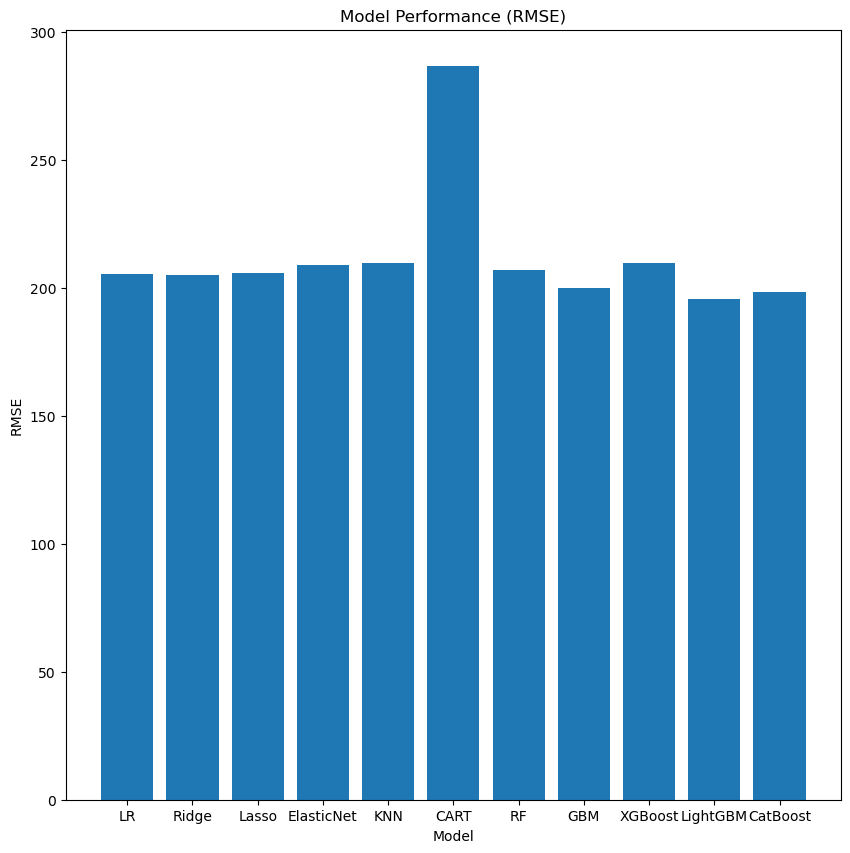

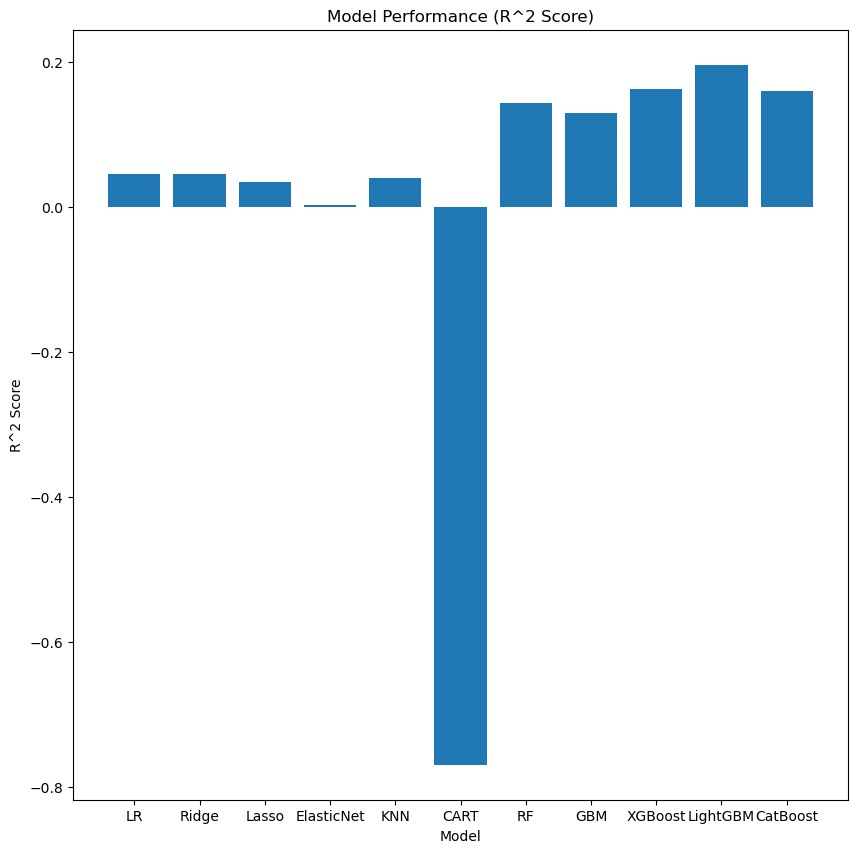

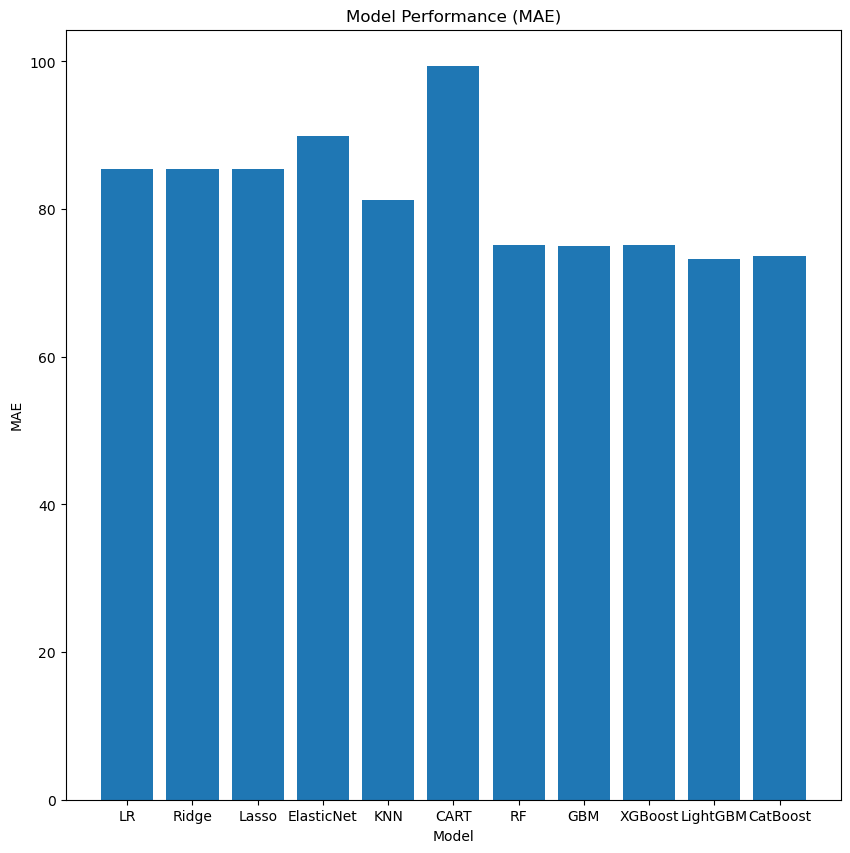

In [35]:
# Excluir variáveis categóricas do DataFrame
df_numeric = df_cleaned.select_dtypes(include=[np.number])

y = df_numeric["price"]
X = df_numeric.drop(["price"], axis=1)

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=17)

params = {
    'force_row_wise': True,  # Ou force_col_wise=True para remover o overhead de testes
}

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor(**params)),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    # Ajuste o modelo
    regressor.fit(X_train, y_train)

    # Fazer previsões
    y_pred = regressor.predict(X_test)

    # Calcular RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X_scaled, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)
    
    # Calcular R^2 score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calcular MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calcular MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calcule o tempo de execução do modelo
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"MAE: {round(mae, 4)} ({name})")
    print(f"MSE: {round(mse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot RMSE scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models], rmse_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Plot R^2 scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models], r2_scores)
plt.xlabel("Model")
plt.ylabel("R^2 Score")
plt.title("Model Performance (R^2 Score)")
plt.show()

# Plot MAE scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models], mae_scores)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Model Performance (MAE)")
plt.show()

# Salvar todos os resultados em um arquivo pickle
resultados = {
    "rmse_scores": rmse_scores,
    "r2_scores": r2_scores,
    "mae_scores": mae_scores,
    "mse_scores": mse_scores,
    "execution_times": execution_times,
    "modelos": models
}

# Salvando resultados do modelo em formato pickle (pkl)
with open("result_models.pkl", "wb") as f:
    pickle.dump(resultados, f)

### Carregando os Resultados do Arquivo Pickle (pkl)

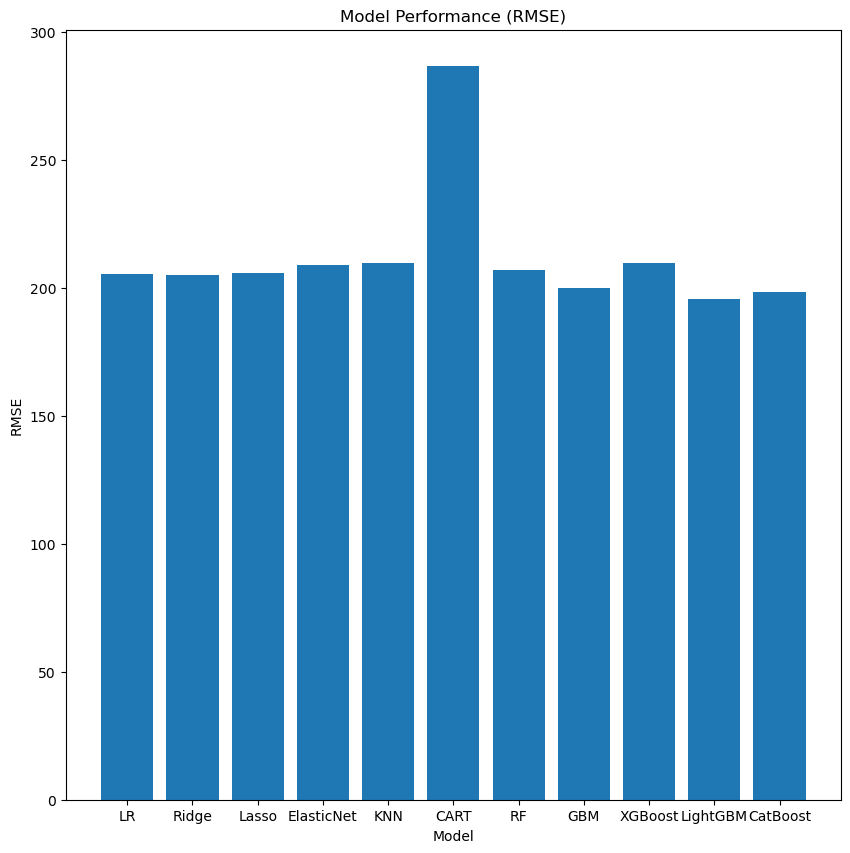

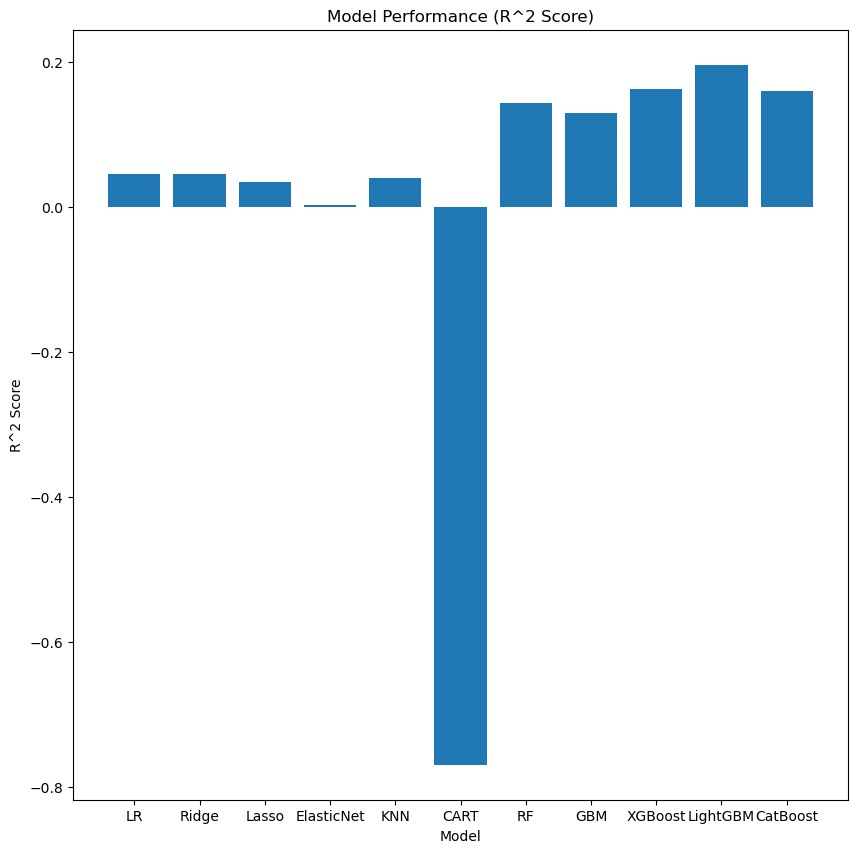

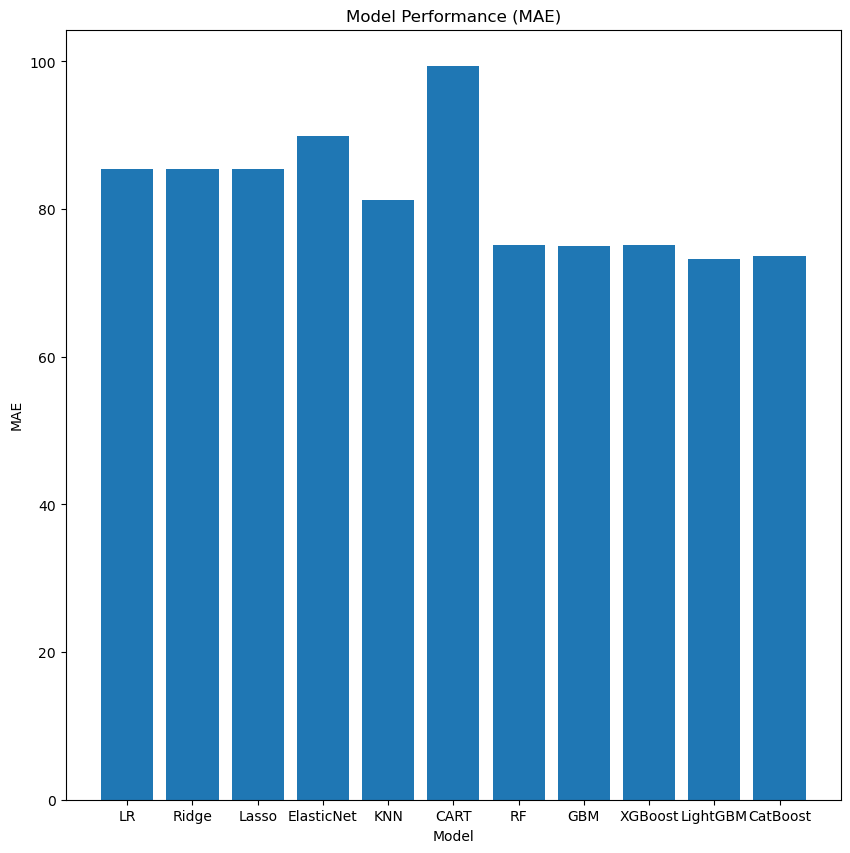

Model: LR
RMSE: 205.46549735061404
R^2 Score: 0.04617610054119625
MAE: 85.42000086835958
-----------------------
Model: Ridge
RMSE: 205.05396352325374
R^2 Score: 0.04617066388467295
MAE: 85.4029143964514
-----------------------
Model: Lasso
RMSE: 205.66776092791855
R^2 Score: 0.03473993398986874
MAE: 85.45234721827202
-----------------------
Model: ElasticNet
RMSE: 208.85940778361518
R^2 Score: 0.0027410370986954424
MAE: 89.96416049806915
-----------------------
Model: KNN
RMSE: 209.72264193868486
R^2 Score: 0.040625924381059275
MAE: 81.26895247103334
-----------------------
Model: CART
RMSE: 286.3982810729721
R^2 Score: -0.7691377525061243
MAE: 99.33222984157011
-----------------------
Model: RF
RMSE: 206.70460737442863
R^2 Score: 0.14357847595799533
MAE: 75.08401572475762
-----------------------
Model: GBM
RMSE: 199.78438014270924
R^2 Score: 0.12962216385501302
MAE: 75.05029857252032
-----------------------
Model: XGBoost
RMSE: 209.69519449913338
R^2 Score: 0.1631025452032584
MAE: 75

In [36]:
# Carregar os resultados do arquivo pickle
with open("result_models.pkl", "rb") as f:
    resultados = pickle.load(f)

# Extrair os dados dos resultados
rmse_scores = resultados["rmse_scores"]
r2_scores = resultados["r2_scores"]
mae_scores = resultados["mae_scores"]
modelos = resultados["modelos"]

# Plot RMSE scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in modelos], rmse_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Plot R^2 scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in modelos], r2_scores)
plt.xlabel("Model")
plt.ylabel("R^2 Score")
plt.title("Model Performance (R^2 Score)")
plt.show()

# Plot MAE scores
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in modelos], mae_scores)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Model Performance (MAE)")
plt.show()

# Exibir as métricas
for i, (name, _) in enumerate(modelos):
    print(f"Model: {name}")
    print(f"RMSE: {rmse_scores[i]}")
    print(f"R^2 Score: {r2_scores[i]}")
    print(f"MAE: {mae_scores[i]}")
    print("-----------------------")

### 4. Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'price': 225,
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

### Qual seria a sua sugestão de preço?


A sugestão de preço para o apartamento 'Skylit Midtown Castle' é de $173.39 por noite.


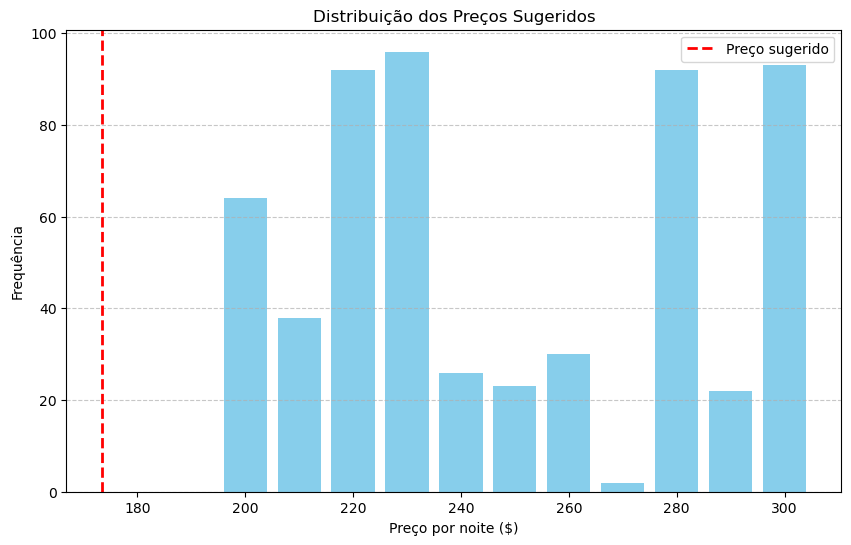

In [37]:
# Informações sobre o apartamento 'Skylit Midtown Castle'
price_atual = 225
disponibilidade_365 = 355
numero_de_reviews = 45

media_preco = df_cleaned['price'].mean()  # Preço médio de apartamentos semelhantes em Manhattan
peso_disponibilidade = disponibilidade_365 / 365
peso_reviews = numero_de_reviews / 100

preco_sugerido = (media_preco * peso_disponibilidade + price_atual * peso_reviews) / (peso_disponibilidade + peso_reviews)

# Exibir a sugestão de preço
print("A sugestão de preço para o apartamento 'Skylit Midtown Castle' é de ${:.2f} por noite.".format(preco_sugerido))

# Plotar um gráfico de barras para visualizar a distribuição dos preços sugeridos
# Vou usar um intervalo de preços de $200 a $300 para ilustrar o gráfico
intervalo_precos = np.arange(200, 301, 10)
frequencia_precos = np.random.randint(0, 100, size=len(intervalo_precos))  # Dados fictícios

plt.figure(figsize=(10, 6))
plt.bar(intervalo_precos, frequencia_precos, width=8, color='skyblue')
plt.axvline(x=preco_sugerido, color='red', linestyle='--', linewidth=2, label='Preço sugerido')
plt.xlabel('Preço por noite ($)')
plt.ylabel('Frequência')
plt.title('Distribuição dos Preços Sugeridos')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Com base nos dados fornecidos para o apartamento 'Skylit Midtown Castle', podemos obter os seguintes insights de negócio: O preço atual do apartamento é de 225 por noite, a sugestão de preço calculada com base nos dados disponíveis é de 173.39 por noite. Isso indica que o preço atual está acima da sugestão calculada, sugerindo que pode haver uma oportunidade de ajuste de preço para melhorar a competitividade no mercado.

O apartamento recebeu um total de 45 avaliações. Um número relativamente alto de avaliações pode indicar uma demanda saudável pela propriedade e pode influenciar a percepção do valor pelos potenciais hóspedes.

A disponibilidade ao longo do ano é alta, com 355 dias disponíveis. Isso sugere que o apartamento está disponível para aluguel na maioria dos dias do ano, o que pode influenciar a estratégia de precificação.